# 1D Phase Mapping Demonstration
Here I create a fixed 1D dataset of phases to demonstrate the application of the Phase Map.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spy
from scipy.stats import kde
import imageio
import os
import cv2
import PIL
from PIL import Image
from os.path import isfile, join

num = 100000

phases = np.zeros(num)
non_random_phases = np.zeros(num)
for i in range(num):
    phases[i] = np.random.uniform(-np.pi,np.pi)
    non_random_phases[i] = np.random.uniform(-np.pi,np.pi)
    if i > 0 and i < 4000:
        non_random_phases[i] = np.random.uniform(1,2)#np.random.normal(scale=0.4, loc=-1)
scale = 1
Dk = np.roll(phases,scale)-phases
Dknr = np.roll(non_random_phases,scale)-non_random_phases
map1 = [phases, np.roll(phases,scale)]
map2 = [non_random_phases, np.roll(non_random_phases,scale)]
x=non_random_phases
y=np.roll(non_random_phases,scale)

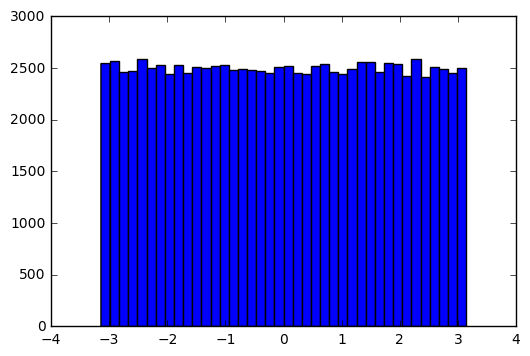

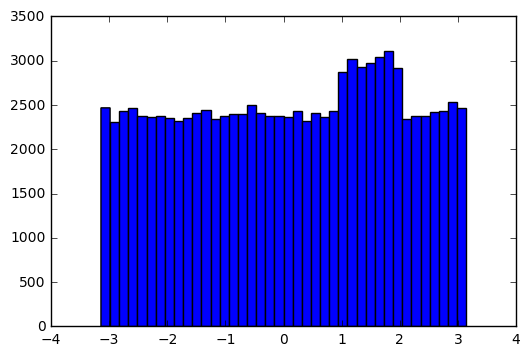

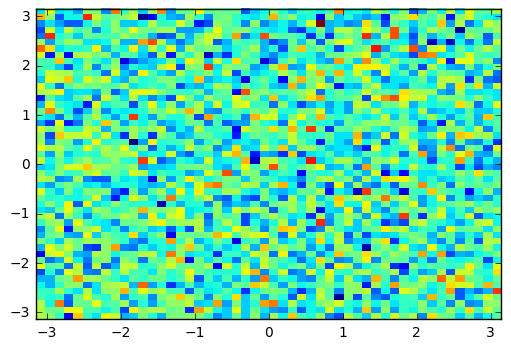

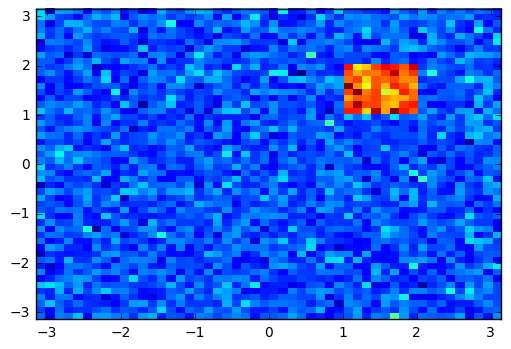

In [12]:
plt.close("all")
plt.figure('1')
plt.hist(phases, bins=40)

plt.figure('2')
plt.hist(non_random_phases, bins=40)

nbins = 50
plt.figure('3')
plt.hist2d(phases, np.roll(phases,scale),bins=nbins)

plt.figure('4')
plt.hist2d(non_random_phases, np.roll(non_random_phases,scale),bins=nbins)

plt.show()

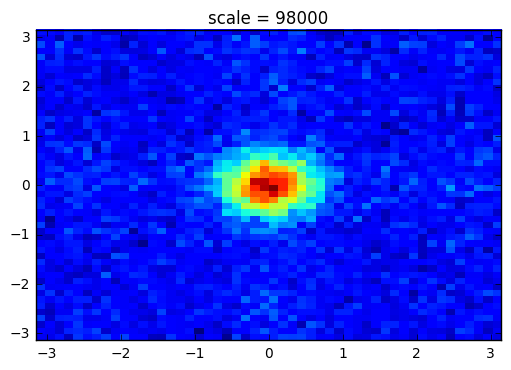

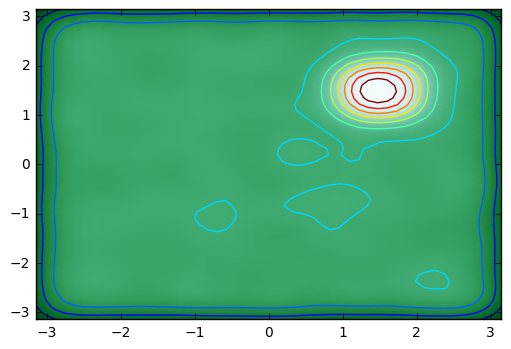

In [344]:
k = kde.gaussian_kde(map2)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.figure('test')
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
plt.contour(xi, yi, zi.reshape(xi.shape),11)
plt.show()

# KS test for consistency with GRF
Because the phase maps are plotting the same distribution against itself (however shifted about separate axes), the original distribution should be compared to that of a Gaussian Random Field, as this will dictate the level of non-linear growth in the sample.

In [6]:
test = spy.ks_2samp(phases,non_random_phases)
print(test)

Ks_2sampResult(statistic=0.029620000000000091, pvalue=1.4367199820286463e-38)


# Phase Map on different scales
Create a bunch of frames of different phase maps of different length scales

In [13]:
num = 100000
phases = np.zeros(num)
non_random_phases = np.zeros(num)
for i in range(num):
    phases[i] = np.random.uniform(-np.pi,np.pi)
    if i > 0 and i < 10000:
        phases[i] = np.random.normal(scale=0.4, loc=0)
frame_sep = 2000
frames = np.int(np.round(num / frame_sep))

for i in range(frames): 
    scale = i*frame_sep
    if scale==0:
        scale = 1
    plt.title('Return map where $\Delta k$ = {0}'.format(scale))
    plt.xlabel('$\phi_k$')
    plt.ylabel('$\phi_{k+\Delta k}$')
    plt.hist2d(phases, np.roll(phases,scale),bins=nbins)
    plt.savefig('C:/Users/Simon/Documents/Honours/Phases of the Universe/test frames/f_{0}.png'.format(i+1), bbox_inches='tight')

Make a video with all recorded frames using the MoVis function

In [20]:
def MoVis(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f)) and f.endswith('.png')]
    #for sorting the file names properly
    files.sort(key = len)
    print('Creating Movie:', pathOut,'...')
    for i in range(len(files)):
        filename=pathIn + files[i]
        #reading each files
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        #inserting the frames into an image array
        frame_array.append(img)
 
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()
    print('Done!')

file_name = 'MoVis_test.avi'
pathIn= 'C:/Users/Simon/Documents/Honours/Phases of the Universe/test frames/'
pathOut = 'C:/Users/Simon/Documents/Honours/Phases of the Universe/test frames/{0}'.format(file_name)
fps = 12.5
MoVis(pathIn, pathOut, fps)

Creating Movie: C:/Users/Simon/Documents/Honours/Phases of the Universe/test frames/MoVis_test.avi ...
Done!
